This notebook was created by Donna Faith Go.

## Learning Dynamic Time Warping

### dtw module
I learned from [this module](https://dynamictimewarping.github.io/python/).

In [1]:
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
help(DTW)

Help on class DTW in module dtw.dtw:

class DTW(builtins.object)
 |  DTW(obj)
 |
 |  The results of an alignment operation.
 |
 |  Objects of class DTW contain alignments computed by the [dtw()]
 |  function.
 |
 |  **Attributes:**
 |
 |  - ``distance`` the minimum global distance computed, *not* normalized.
 |  - ``normalizedDistance`` distance computed, *normalized* for path
 |    length, if normalization is known for chosen step pattern.
 |  - ``N,M`` query and reference length
 |  - ``call`` the function call that created the object
 |  - ``index1`` matched elements: indices in ``x``
 |  - ``index2`` corresponding mapped indices in ``y``
 |  - ``stepPattern`` the ``stepPattern`` object used for the computation
 |  - ``jmin`` last element of reference matched, if ``open_end=True``
 |  - ``directionMatrix`` if ``keep_internals=True``, the directions of
 |    steps that would be taken at each alignment pair (integers indexing
 |    production rules in the chosen step pattern)
 |  - ``

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

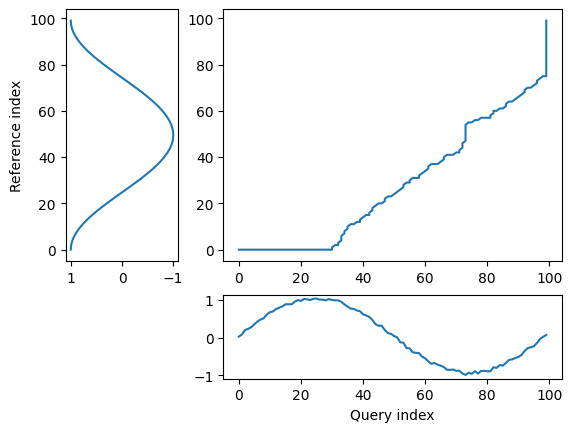

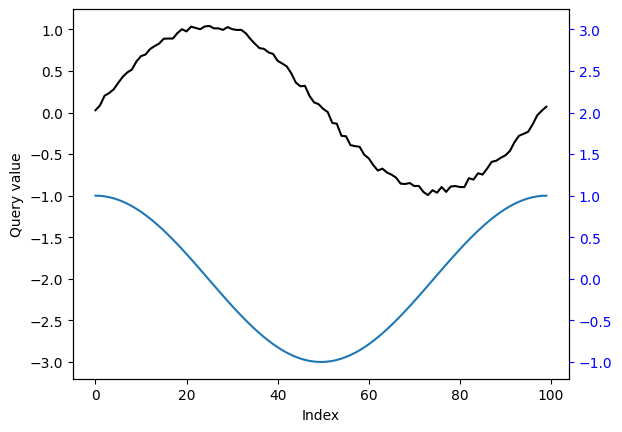

In [3]:
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

### dtaidistance module (Medium)
I learned from [this Medium article](https://medium.com/@markstent/dynamic-time-warping-a8c5027defb6).
Here, they referenced [this video](https://youtu.be/ERKDHZyZDwA?si=3pMgGaKLJULfkGn3). Should watch later.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from dtaidistance import dtw
from scipy.stats import pearsonr
import pandas as pd

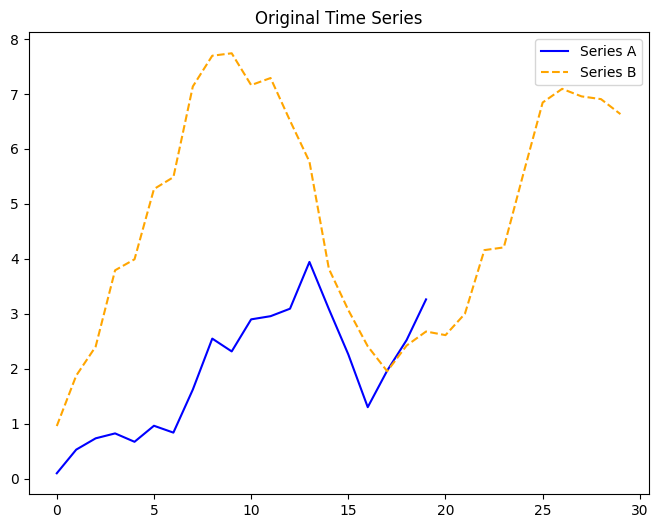

In [7]:
np.random.seed(0)
time_series_a = np.cumsum(np.random.rand(20) * 2 - 1)
time_series_b = np.cumsum(np.random.rand(30) * 2 - 1 + np.sin(np.linspace(0, 3 * np.pi, 30)))

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting the time series
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--', color='orange')

# Setting the title and legend
ax1.set_title('Original Time Series')
ax1.legend()

plt.show()

In [8]:
distance, paths = dtw.warping_paths(time_series_a, time_series_b, use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)

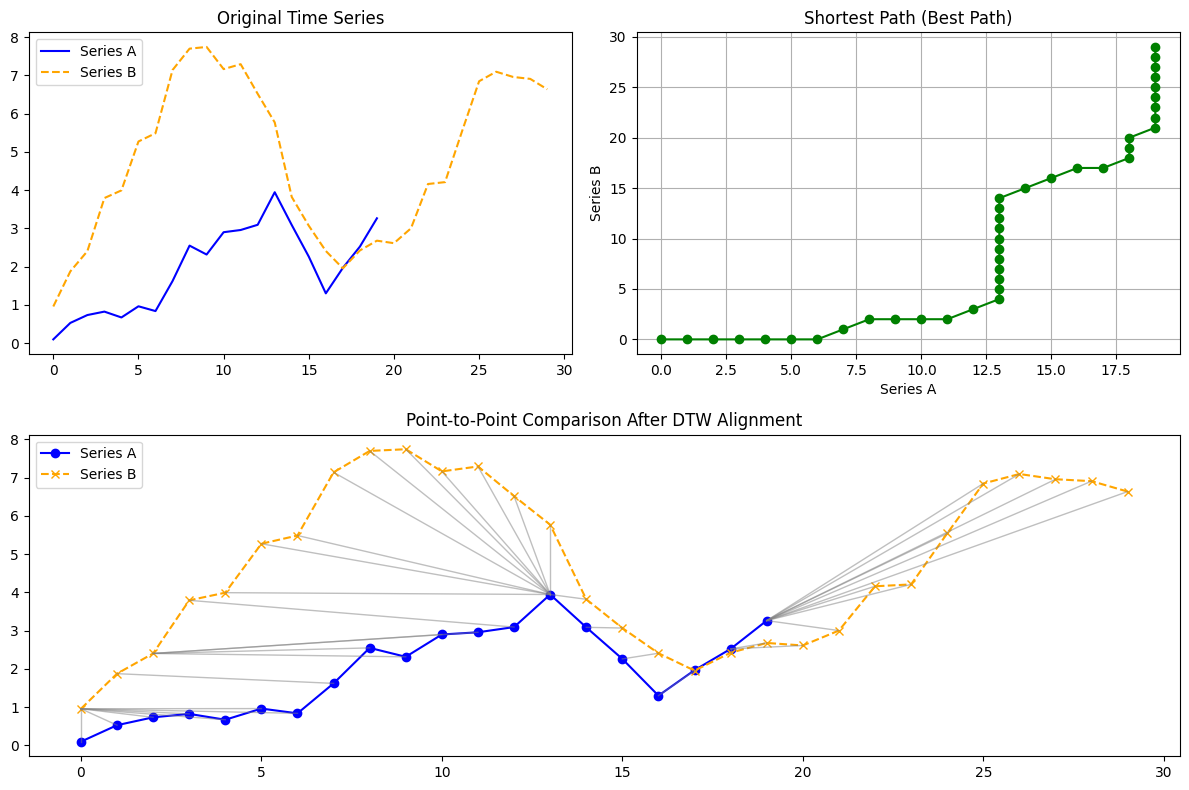

In [9]:
plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

# Shortest Path Plot (Cost Matrix with the path)
# In this example, only the path is plotted, not the entire cost matrix.

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 'green', marker='o', linestyle='-')
ax2.set_title('Shortest Path (Best Path)')
ax2.set_xlabel('Series A')
ax2.set_ylabel('Series B')
ax2.grid(True)

# Point-to-Point Comparison Plot
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(time_series_a, label='Series A', color='blue', marker='o')
ax3.plot(time_series_b, label='Series B', color='orange', marker='x', linestyle='--')
for a, b in best_path:
    ax3.plot([a, b], [time_series_a[a], time_series_b[b]], color='grey', linestyle='-', linewidth=1, alpha = 0.5)
ax3.set_title('Point-to-Point Comparison After DTW Alignment')
ax3.legend()

plt.tight_layout()
plt.show()

In [10]:
results_df = pd.DataFrame({
    'Metric': ['DTW Similarity Score'],
    'Value': [similarity_score]
})

results_df['Description'] = [
    "Lower scores indicate greater similarity between the time series."
]

results_df

,Metric,Value,Description
0,DTW Similarity Score,0.306018,Lower scores indicate greater similarity betwe...


### dtaidistance module (Geeks for Geeks)
I learned from [this article](https://www.geeksforgeeks.org/machine-learning/dynamic-time-warping-dtw-in-time-series/).

In [11]:
import pandas as pd
import yfinance as yf
import numpy as np
from dtaidistance import dtw
import matplotlib.pyplot as plt

In [12]:
ticker_1 = yf.Ticker("TSLA")
ticker_2 = yf.Ticker("AMZN")

data_1 = ticker_1.history(period="1y")
data_2 = ticker_2.history(period="1y")

series_1 = data_1['Close'].values
series_2 = data_2['Close'].values

In [13]:
print("Missing values in TSLA series:", np.isnan(series_1).sum())
print("Missing values in AMZN series:", np.isnan(series_2).sum())

series_1 = pd.Series(series_1).ffill().values
series_2 = pd.Series(series_2).ffill().values

min_length = min(len(series_1), len(series_2))
series_1 = series_1[:min_length]
series_2 = series_2[:min_length]

Missing values in TSLA series: 0
Missing values in AMZN series: 0


In [14]:
distance = dtw.distance(series_1, series_2)
print(f"DTW distance between TSLA and AMZN: {distance}")

DTW distance between TSLA and AMZN: 2128.3910478185253


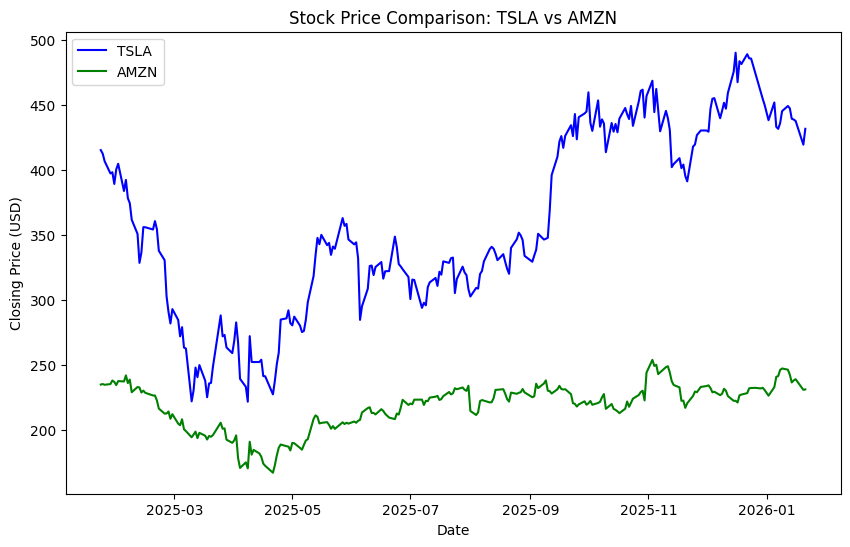

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data_1.index[:min_length], series_1, label="TSLA", color="blue")
plt.plot(data_2.index[:min_length], series_2, label="AMZN", color="green")
plt.title("Stock Price Comparison: TSLA vs AMZN")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()